# Plotting for experiments 1 and 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import graphlearning as gl
import graphlearning.active_learning as al

import batch_active_learning as bal
import utils

from matplotlib.ticker import AutoLocator

In [2]:
#Non-default Parameters
acq_fun_list = ['uc']
save_path_experiment_1 = "Experiment Results/Experiment 1/"
save_path_experiment_2 = "Experiment Results/Experiment 2/"

In [3]:
def tick_function(X, n):
    V = X / n
    return ["%d%%" % np.round(100*z) for z in V]
TICK_LENGTH = 10
TICK_WIDTH = 2
    
def experiment_1_plotter(x_dict, y_dict, dataset, include_sota=False, fine_tuned=False):
    fig = plt.figure()
    fig.set_size_inches(12.5, 8.5)
    ax1 = fig.add_subplot()
    ax2 = ax1.twiny()

    dataset_size = utils.SAR_DATASET_SIZE_DICT[dataset]

    ax1.set_xlabel('Number of Labeled Points')
    ax1.set_ylabel('Accuracy (%)')
    
    marker_types = ["^", "o", "d", "p", "*"]
    for i in range(len(bal.AL_METHODS)):
        this_key = bal.AL_METHODS[i]
        ax1.plot(x_dict[this_key], y_dict[this_key], label=bal.AL_METHOD_NAMES[i], linewidth=3, markevery=3, markersize=15)

    ax1.tick_params(axis='x', length=TICK_LENGTH, width=TICK_WIDTH)
    for side in ['left', 'right', 'top', 'bottom']:
        ax1.spines[side].set_linewidth(TICK_WIDTH)

    # Add SoTA
    if dataset != 'mstar' and include_sota:
        if dataset == 'open_sar_ship':
            sota_val = 78.15
        elif dataset == 'fusar':
            sota_val = 86.69
        ax1.plot(x_dict['local_max'], sota_val *
                 np.ones_like(x_dict['local_max']), label='SoTA', linestyle='--')

    fontsize = 30
    #ax1.legend(fontsize=fontsize)
    ax1.set_xlabel(r"Number of labeled points", fontsize=fontsize)
    ax1.set_ylabel("Accuracy (%)", fontsize=fontsize)
    ax1.set_ylim((None, 100))
    ax1.set_xlim((0, None))
    
    ax1.autoscale(enable=True, axis='x', tight=False)
    
    new_tick_locations = np.linspace(0, bal.MAX_NEW_SAMPLES_PROPORTIONS[dataset], 5) * dataset_size
    
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(new_tick_locations)
    ax2.set_xticklabels(tick_function(new_tick_locations, dataset_size), fontsize=fontsize)
    ax2.set_xlabel(r"Percentage of Training Data", fontsize=fontsize)
    
    ax1.tick_params(axis='both', labelsize=fontsize, length=TICK_LENGTH, width=TICK_WIDTH)
    ax2.tick_params(axis='both', labelsize=fontsize, length=TICK_LENGTH, width=TICK_WIDTH)
    plt.savefig(save_path_experiment_1 + dataset + '_' + str(include_sota) + '.png', bbox_inches='tight')
    plt.show()

    return

def get_data_experiment_1(dataset):
    df = pd.read_pickle(save_path_experiment_1 + 'Pickles/' + dataset + '_num_labels_dict.pkl')
    df = df.T
    x_dict = {name: [n for n in df[name] if not np.isnan(n)] for name in df.keys()}

    df = pd.read_pickle(save_path_experiment_1 + 'Pickles/' + dataset + '_full_acc_dict.pkl')
    df = df.T
    y_dict = {name: [n for n in df[name] if not np.isnan(n)] for name in df.keys()}

    return x_dict, y_dict

def main_experiment_1_plotter(dataset, include_sota=True):
    x_dict, y_dict = get_data_experiment_1(dataset)
    experiment_1_plotter(x_dict, y_dict, dataset, include_sota=include_sota)

In [4]:
def experiment_2_plotter(x_dict, y_dict, dataset, embedding, include_sota=False):
    fig = plt.figure()
    fig.set_size_inches(12.5, 8.5)
    ax1 = fig.add_subplot()
    ax2 = ax1.twiny()

    dataset_size = utils.SAR_DATASET_SIZE_DICT[dataset]

    ax1.set_xlabel('Number of Labeled Points')
    ax1.set_ylabel('Accuracy (%)')
    
    marker_types = ["^", "o", "d", "p", "*"]
    for i, this_key in enumerate(bal.ACQUISITION_FUNCTIONS):
        ax1.plot(x_dict[this_key], y_dict[this_key], label=this_key, linewidth=3, markevery=3, markersize=15)
    
    ax1.tick_params(axis='x', length=TICK_LENGTH, width=TICK_WIDTH)
    for side in ['left', 'right', 'top', 'bottom']:
        ax1.spines[side].set_linewidth(TICK_WIDTH)

    # Add SoTA
    if dataset != 'mstar' and include_sota:
        if dataset == 'open_sar_ship':
            sota_val = 78.15
        elif dataset == 'fusar':
            sota_val = 86.69
        ax1.plot(x_dict['uc'], sota_val *
                 np.ones_like(x_dict['uc']), label='SoTA', linestyle='--')

    fontsize = 30
    #ax1.legend(fontsize=fontsize)
    ax1.set_xlabel(r"Number of labeled points", fontsize=fontsize)
    ax1.set_ylabel("Accuracy (%)", fontsize=fontsize)
    ax1.set_ylim((None, 100))
    
    if embedding == "fine_tuned_tl":
        ax1.set_xlim((dataset_size*0.05, None))
    else:
        ax1.set_xlim((0, None))
    
    ax1.autoscale(enable=True, axis='x', tight=False)
    
    if embedding == "fine_tuned_tl":
        new_tick_locations = np.linspace(0.05, bal.MAX_NEW_SAMPLES_PROPORTIONS[dataset], 5) * dataset_size
    else:
        new_tick_locations = np.linspace(0, bal.MAX_NEW_SAMPLES_PROPORTIONS[dataset], 5) * dataset_size

    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(new_tick_locations)
    ax2.set_xticklabels(tick_function(new_tick_locations, dataset_size), fontsize=fontsize)
    ax2.set_xlabel(r"Percentage of Training Data", fontsize=fontsize)
    
    ax1.tick_params(axis='both', labelsize=fontsize, length=TICK_LENGTH, width=TICK_WIDTH)
    ax2.tick_params(axis='both', labelsize=fontsize, length=TICK_LENGTH, width=TICK_WIDTH)
    plt.savefig(save_path_experiment_2 + dataset + '_' + embedding + '.png', bbox_inches='tight')
    plt.show()

    return

def get_data_experiment_2(dataset, embedding):
    file_prefix = save_path_experiment_2 + 'Pickles/' + dataset + '_' + embedding
    df = pd.read_pickle( file_prefix + '_labels_dict.pkl')
    df = df.T
    x_dict = {name: [n for n in df[name] if not np.isnan(n)] for name in df.keys()}

    df = pd.read_pickle( file_prefix + '_acc_dict.pkl')
    df = df.T
    y_dict = {name: [n for n in df[name] if not np.isnan(n)] for name in df.keys()}
    return x_dict, y_dict

def just_save_legend_experiment_2():
    """This function just saves the legend"""
    dataset = "fusar"
    x_dict, y_dict = get_data_experiment_2(dataset, utils.AVAILABLE_EMBEDDINGS[0])
    include_sota = True
    fontsize = 30

    fig = plt.figure("Line plot")
    legendFig = plt.figure("Legend plot")
    ax = fig.add_subplot(111)
    line_list = []
    for i, this_key in enumerate(bal.ACQUISITION_FUNCTIONS):
        tmp, = ax.plot(x_dict[this_key], y_dict[this_key], label=this_key, linewidth=3, markevery=3, markersize=15)
        line_list.append(tmp)
    sota_val = 86.69
    tmp, = ax.plot(x_dict['uc'], sota_val * np.ones_like(x_dict['uc']), label='SoTA', linestyle='--')
    line_list.append(tmp)

    labels_list = [x for x in bal.ACQUISITION_FUNCTIONS]
    labels_list.append('SoTA')
    legendFig.legend(line_list, labels_list, loc='center', ncols=5)
    #legendFig.show()
    #legendFig.axes('off')
    #legendFig.tight_layout()
    legendFig.savefig(save_path_experiment_2 + 'legend.png', transparent=True, bbox_inches='tight')

    #plt.savefig(save_path_experiment_2 + 'legend.png')
    #plt.show()
    return


def main_experiment_2_plotter(dataset, embedding, include_sota=True):
    x_dict, y_dict = get_data_experiment_2(dataset, embedding)
    experiment_2_plotter(x_dict, y_dict, dataset, embedding, include_sota=include_sota)

mstar


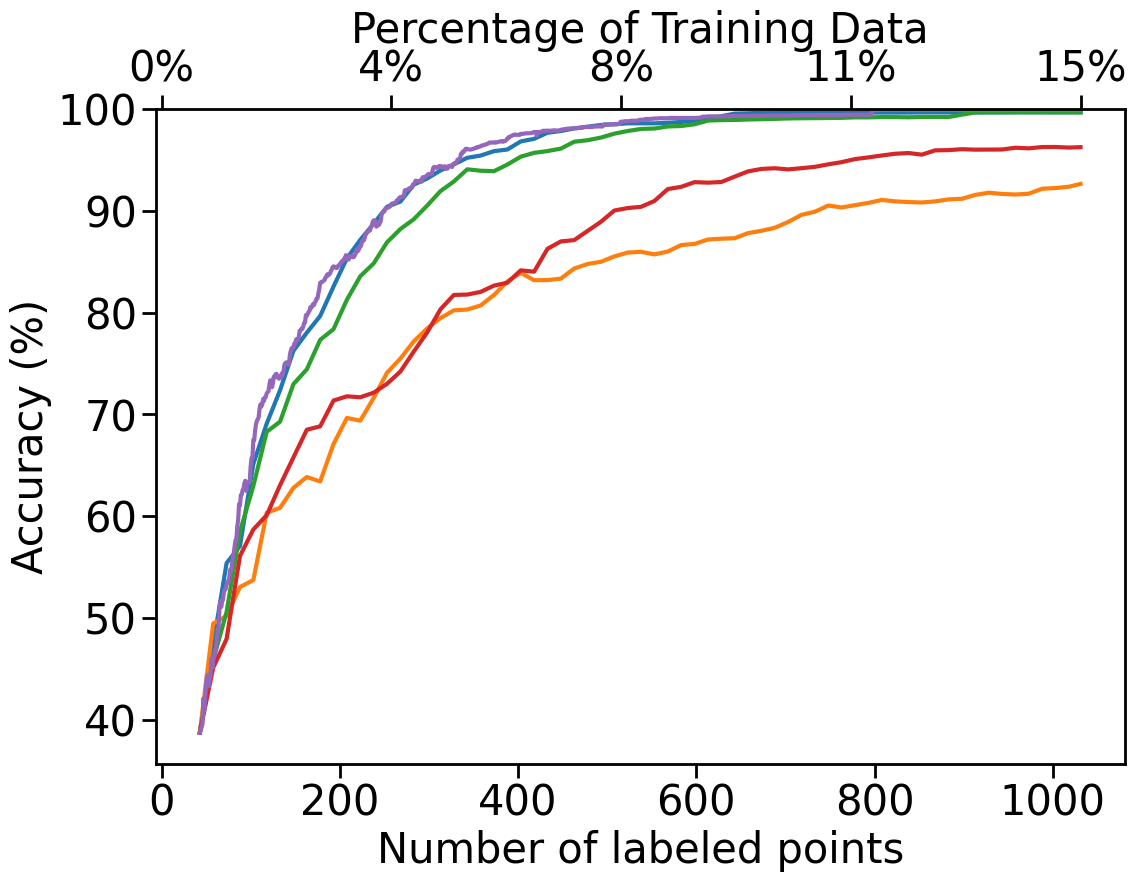

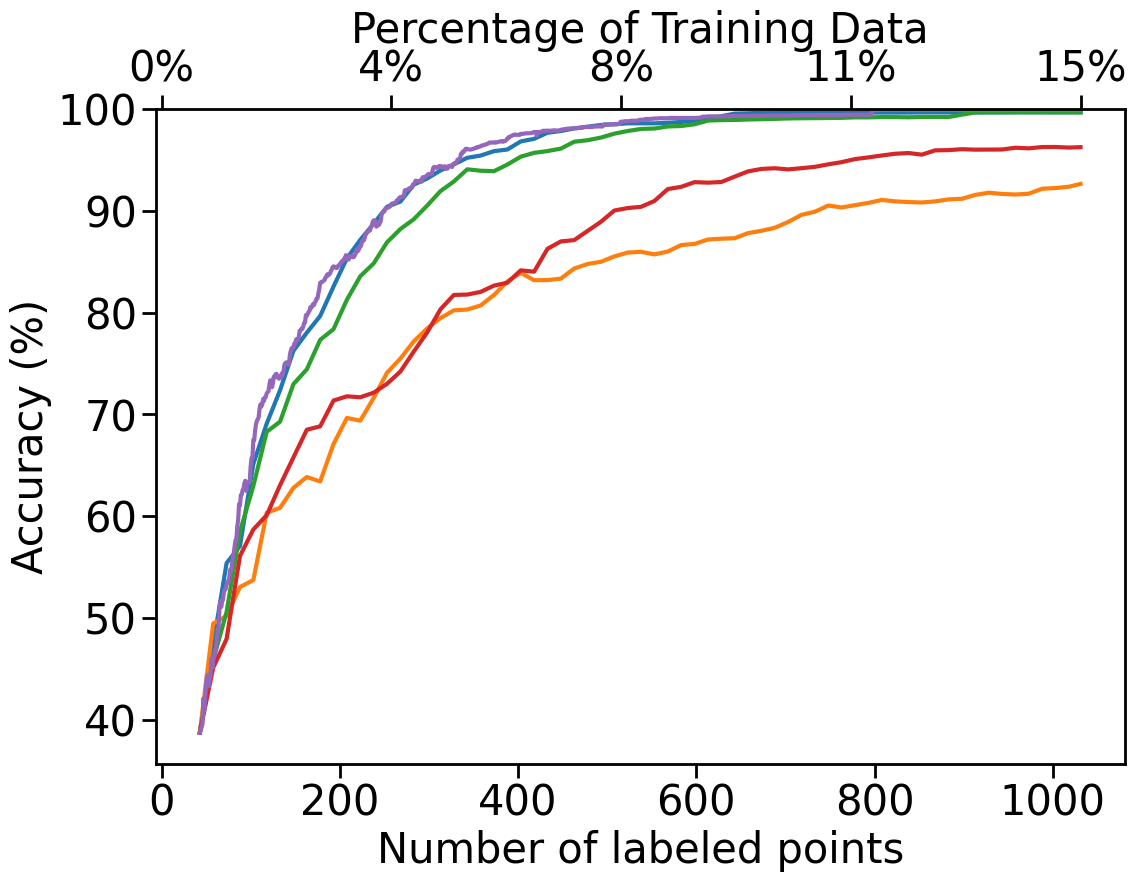

open_sar_ship


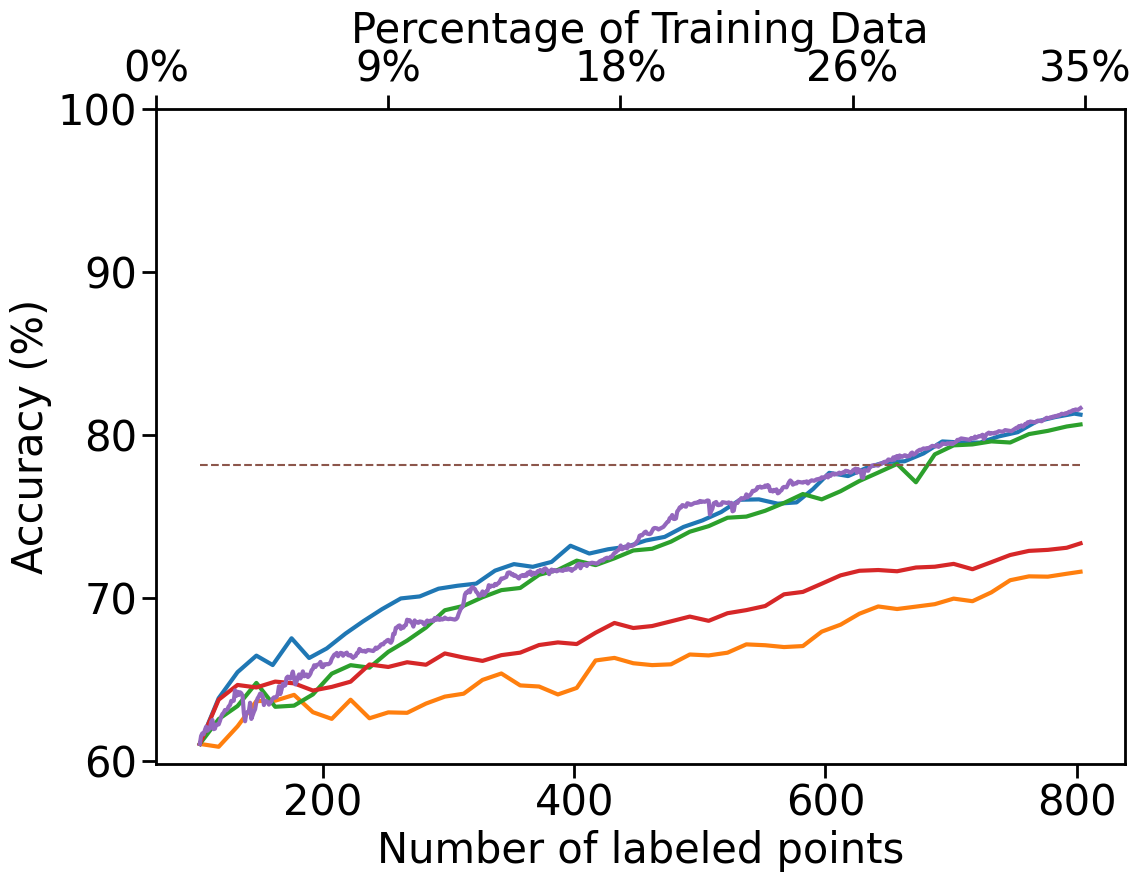

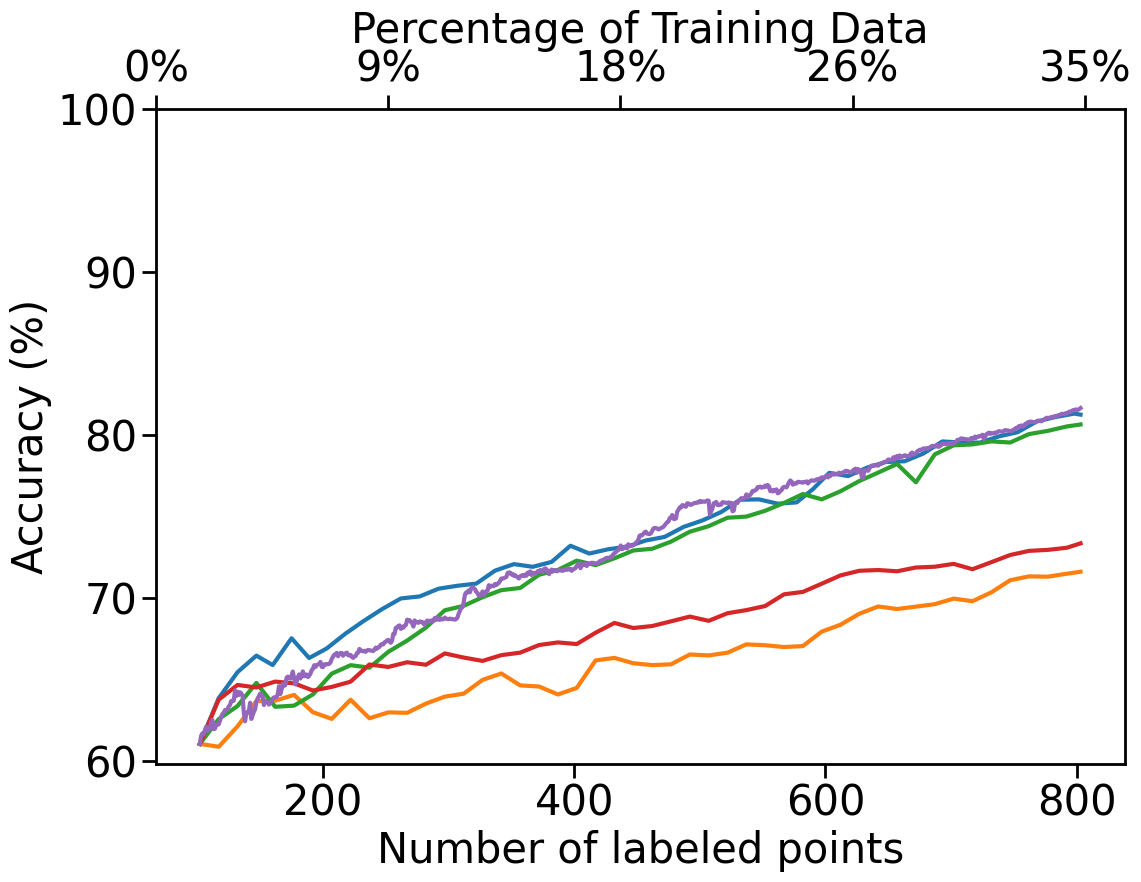

fusar


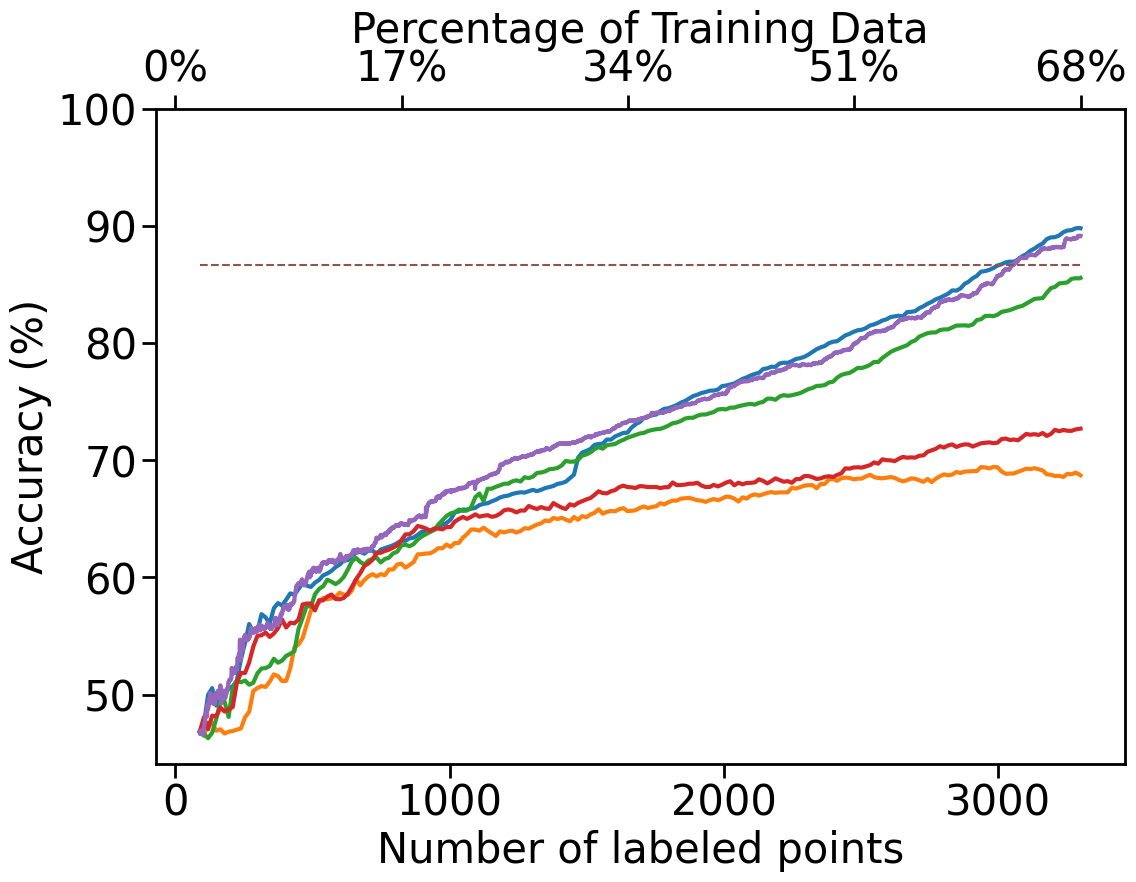

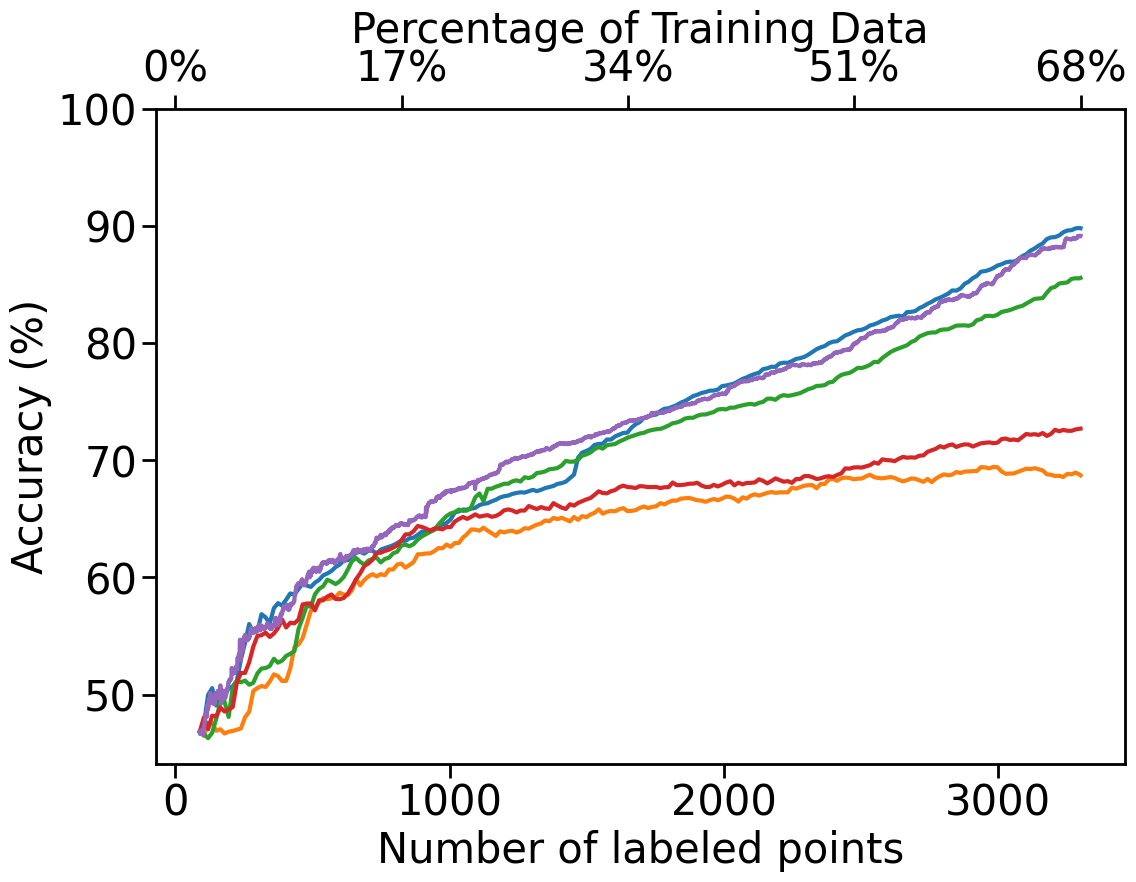

In [5]:
for dataset in utils.AVAILABLE_SAR_DATASETS:
    print(dataset)
    main_experiment_1_plotter(dataset, include_sota=True)
    main_experiment_1_plotter(dataset, include_sota=False)


mstar cnnvae


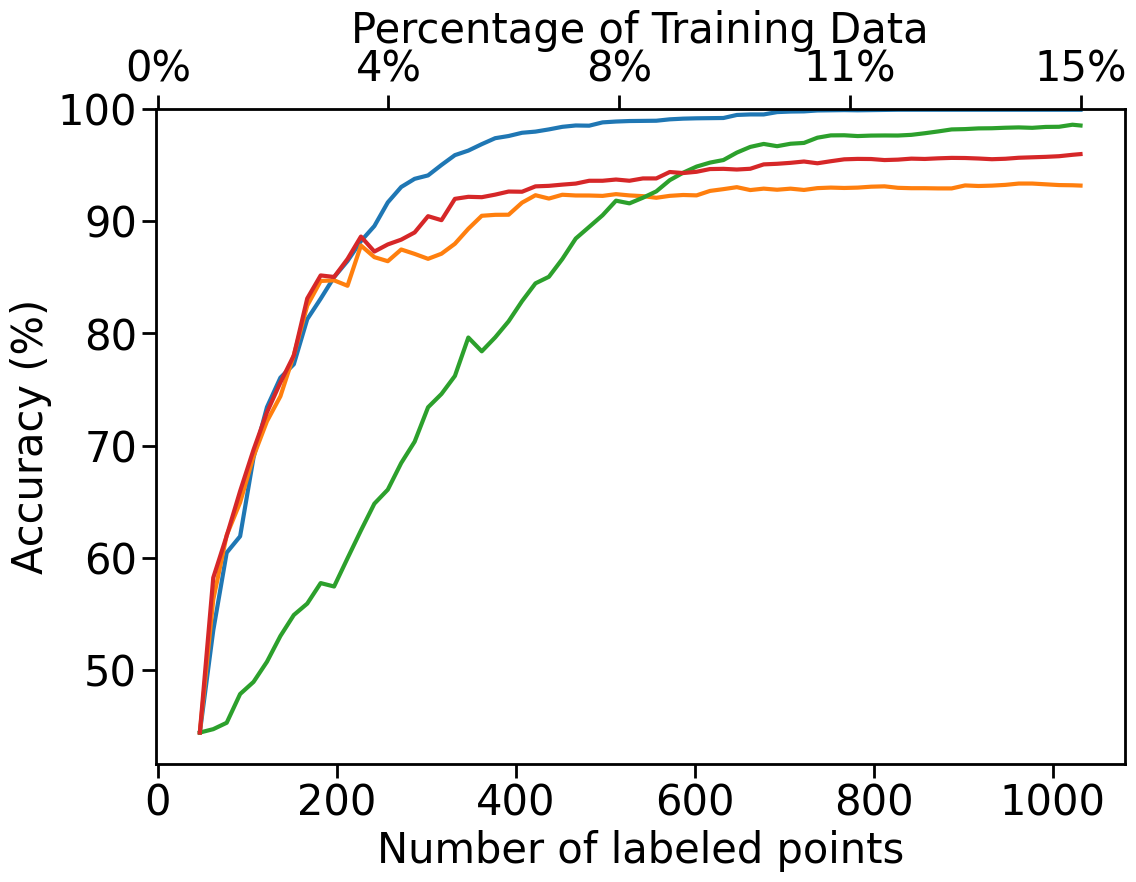

mstar zero_shot_tl


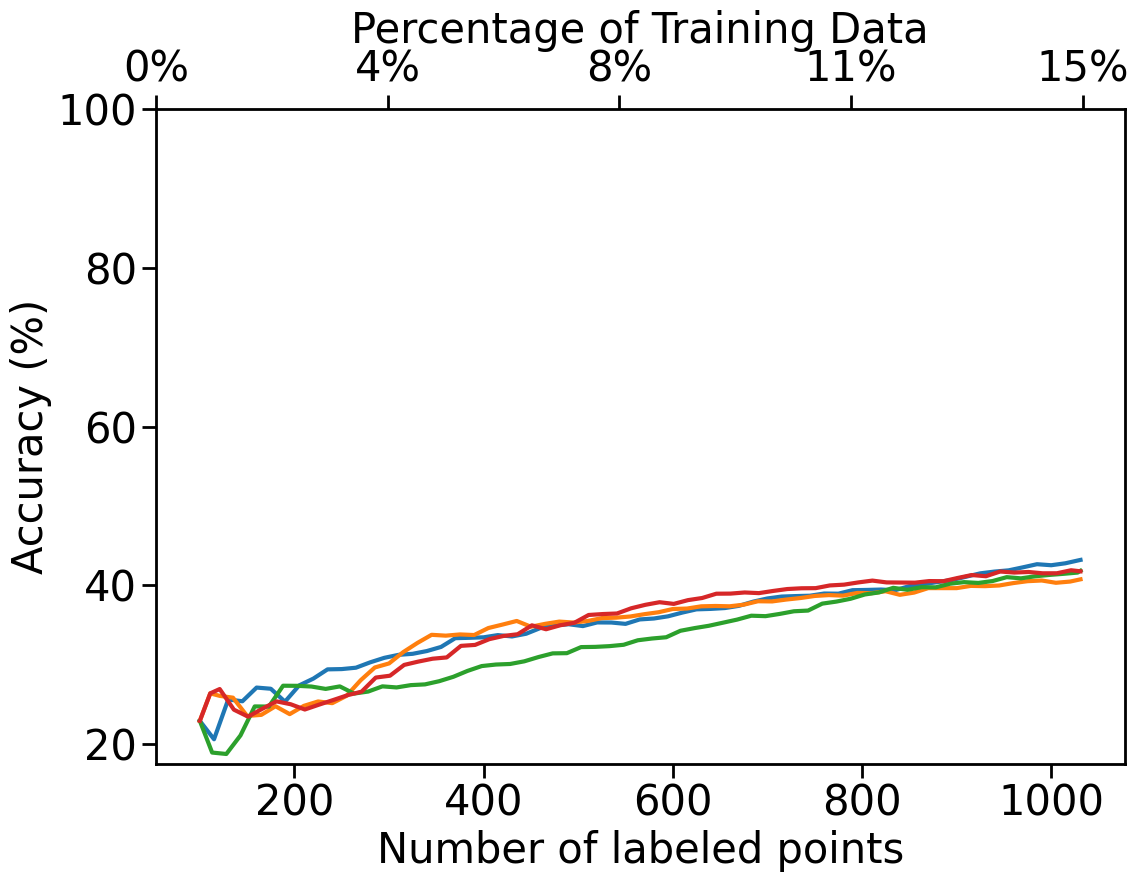

mstar fine_tuned_tl


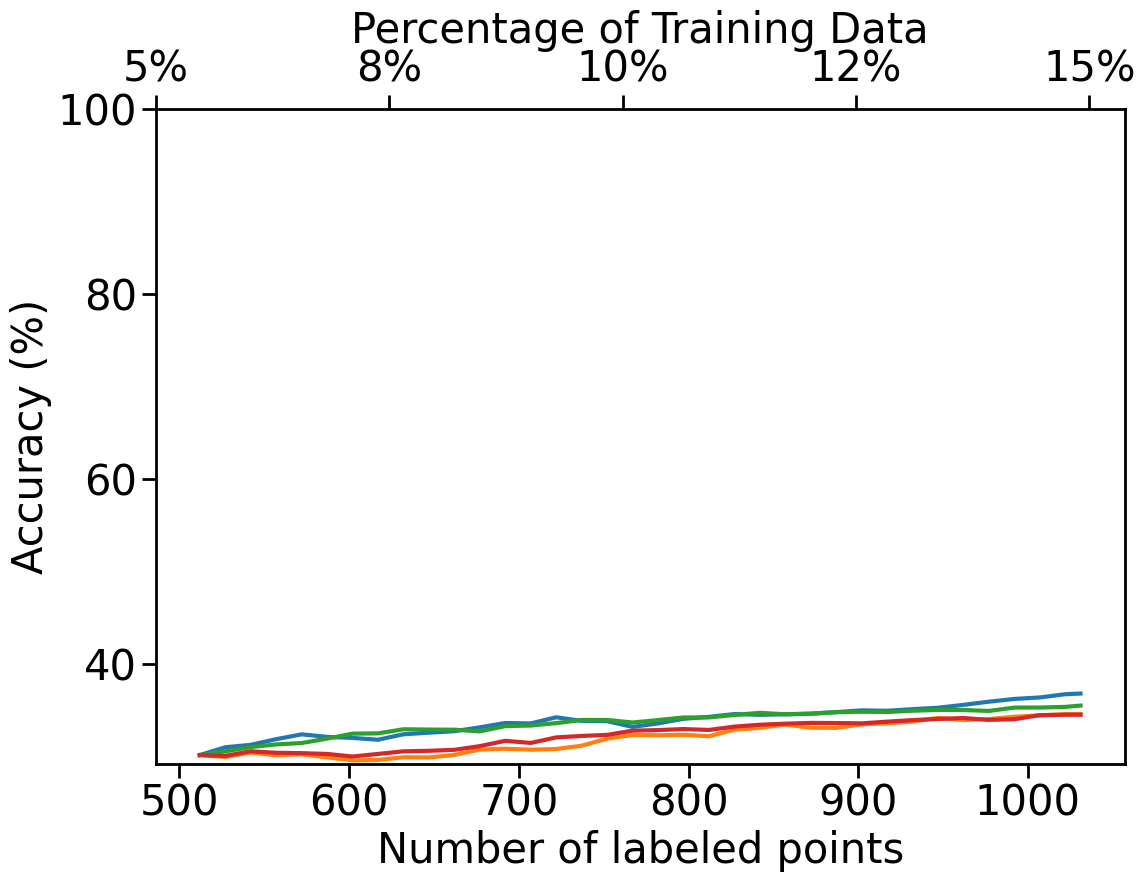

open_sar_ship cnnvae


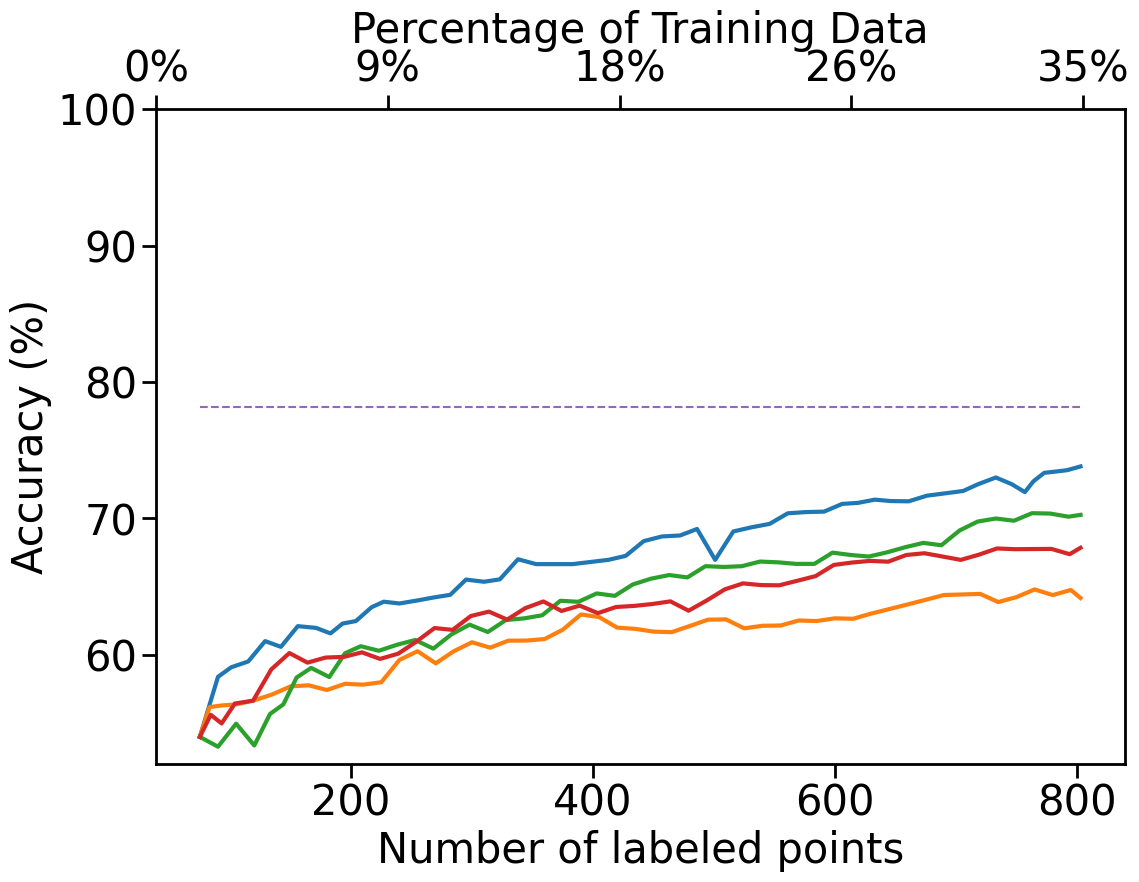

open_sar_ship zero_shot_tl


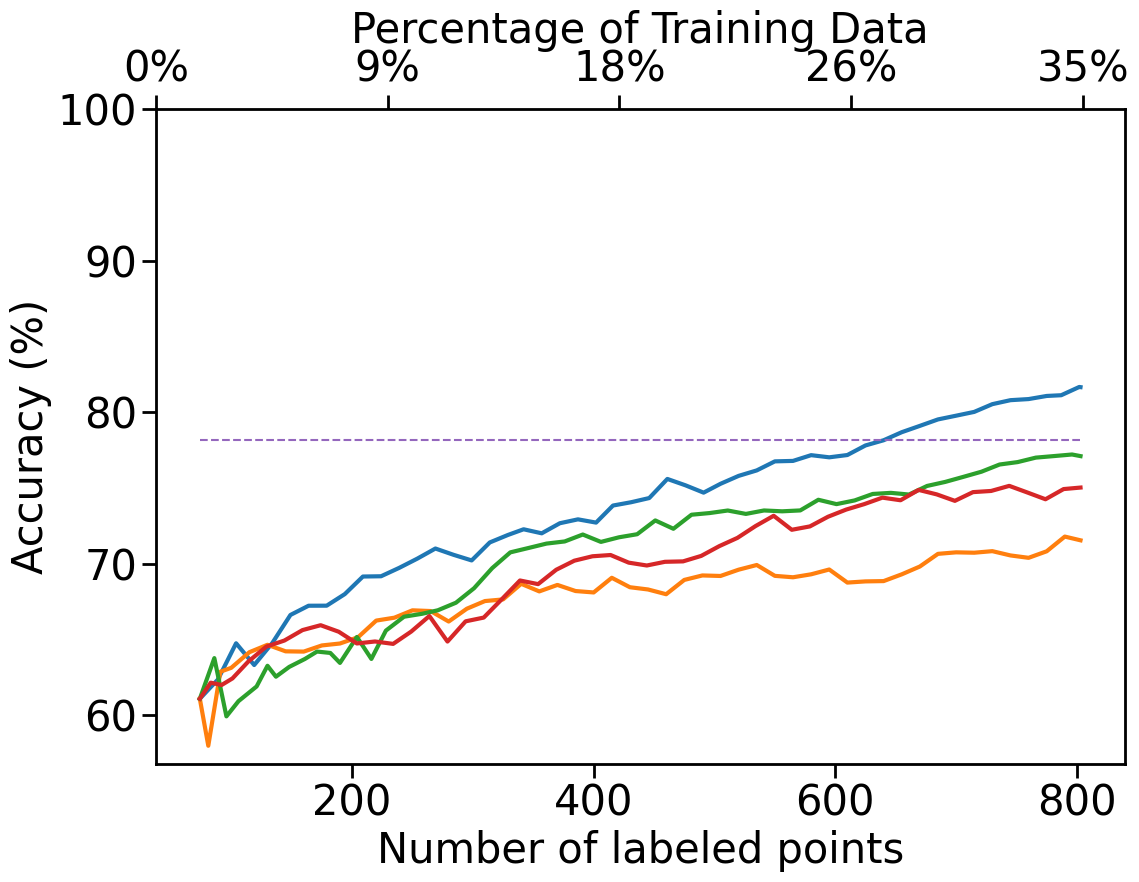

open_sar_ship fine_tuned_tl


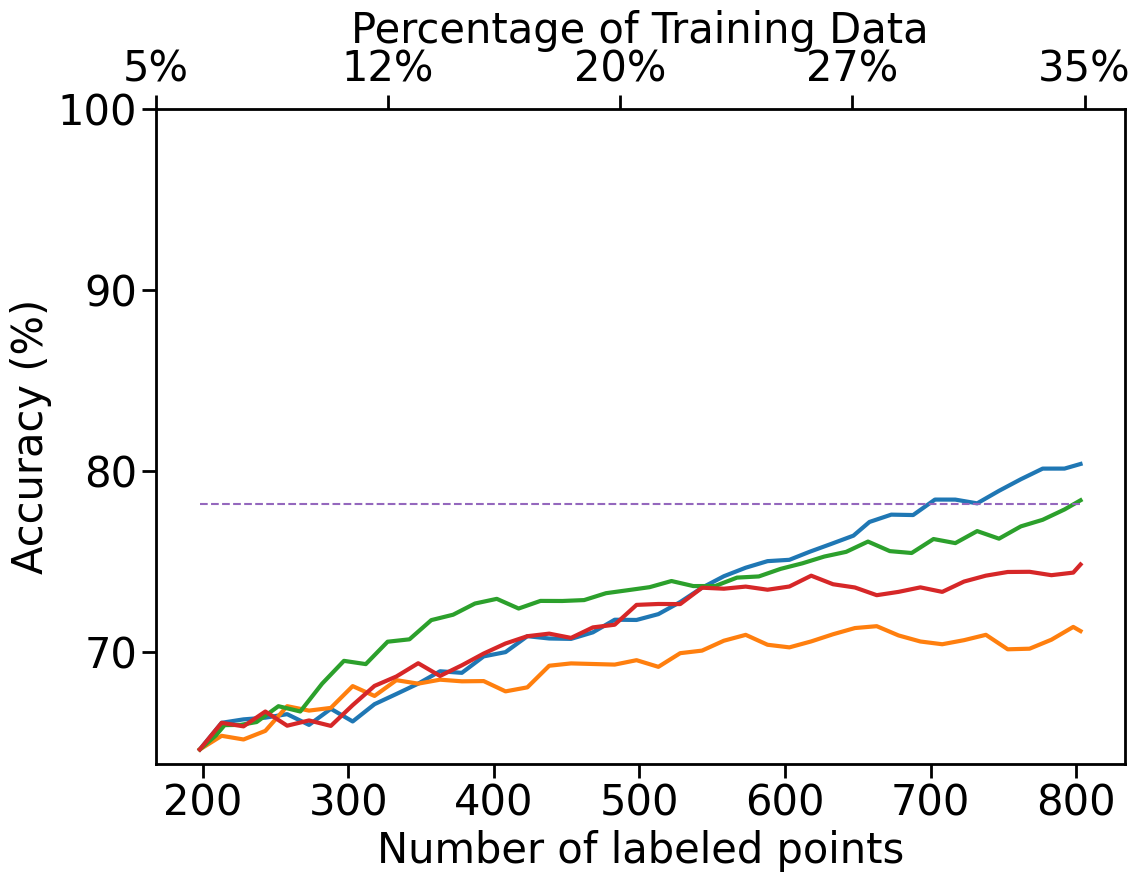

fusar cnnvae


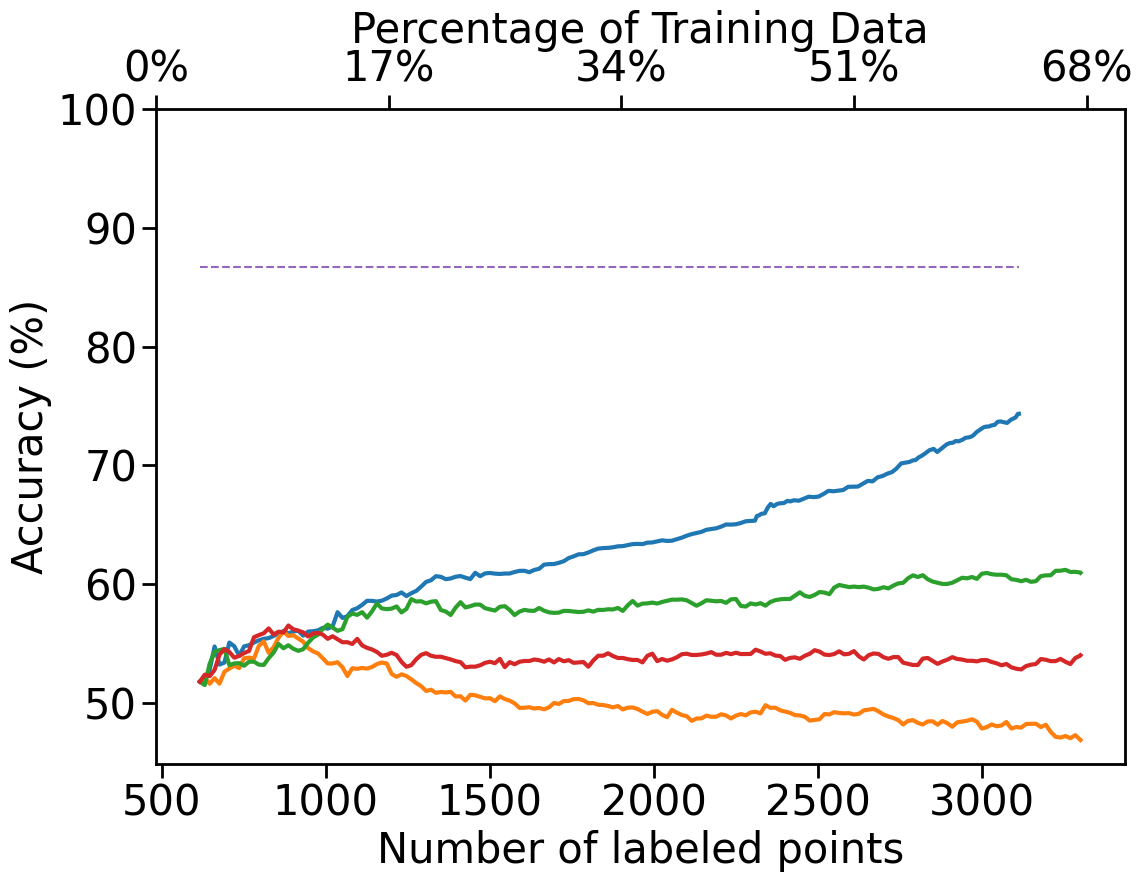

fusar zero_shot_tl


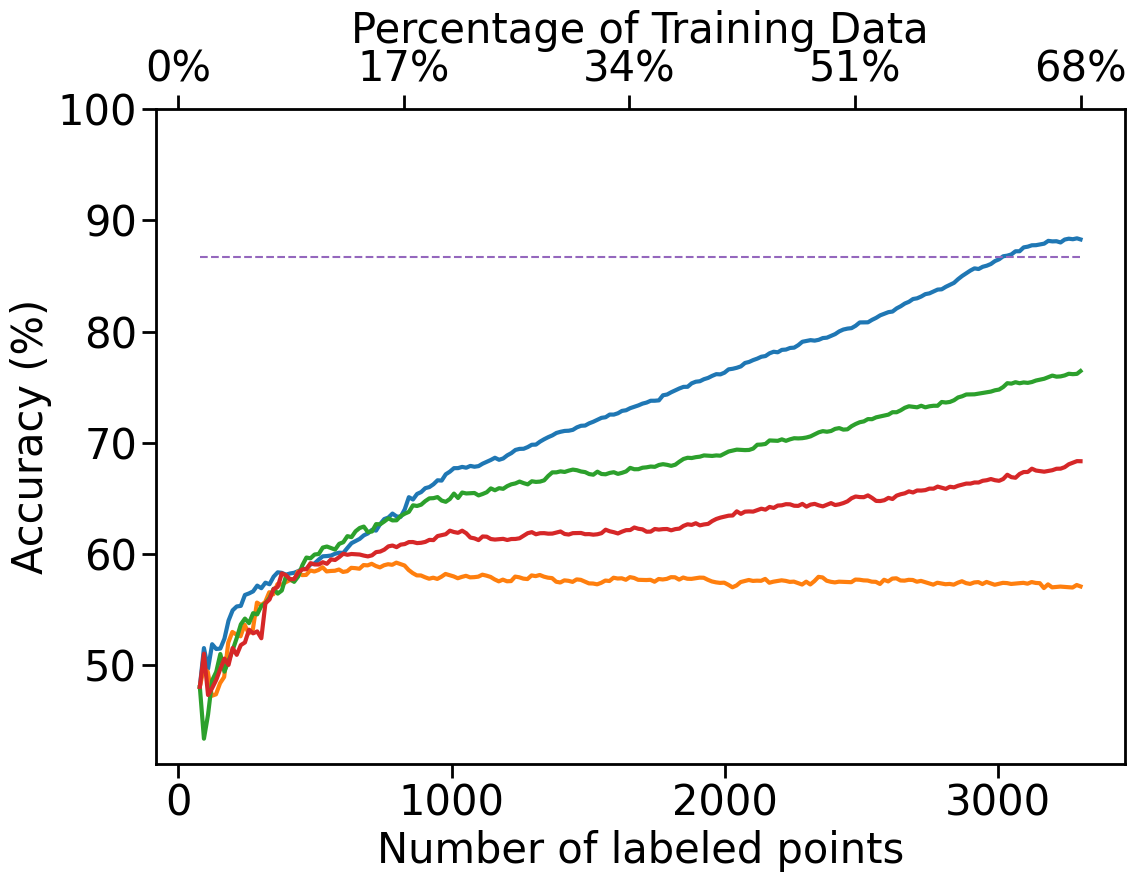

fusar fine_tuned_tl


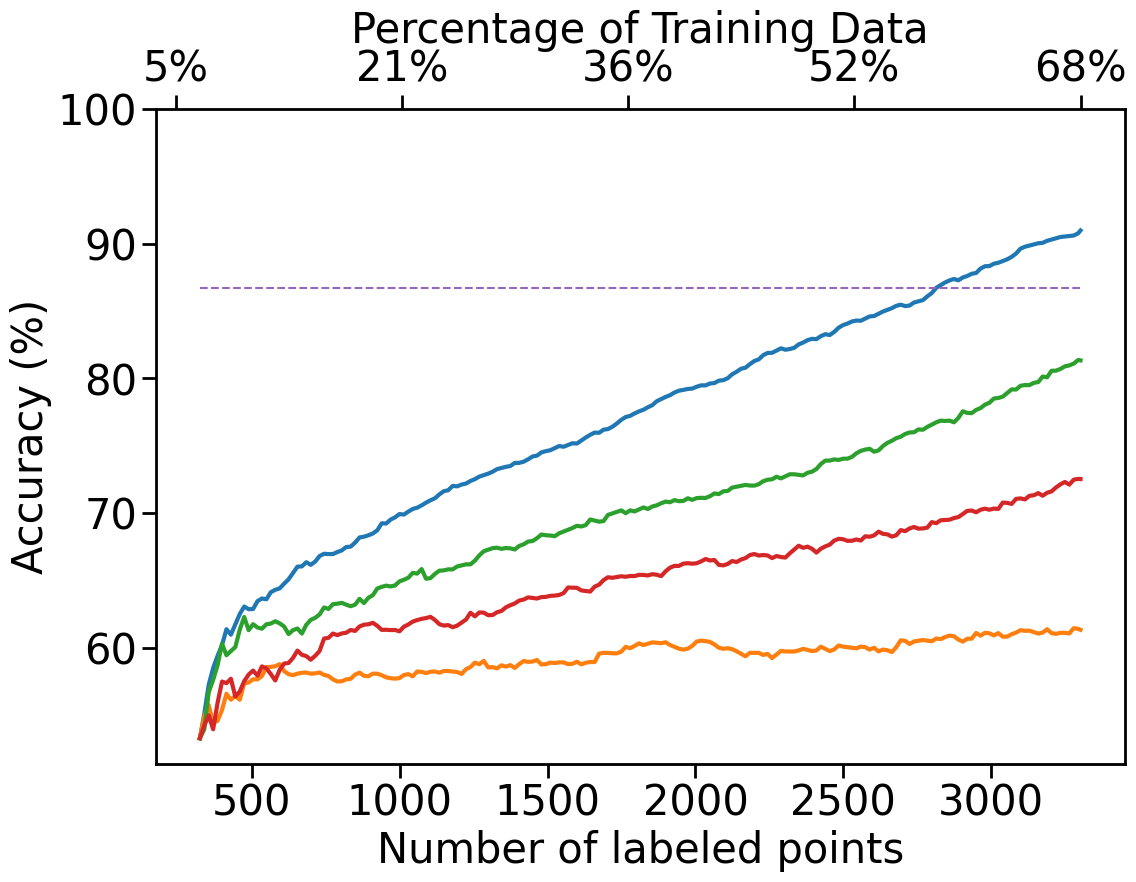

In [6]:
for dataset in utils.AVAILABLE_SAR_DATASETS:
    for embedding in utils.AVAILABLE_EMBEDDINGS:
        print(dataset, embedding)
        main_experiment_2_plotter(dataset, embedding)

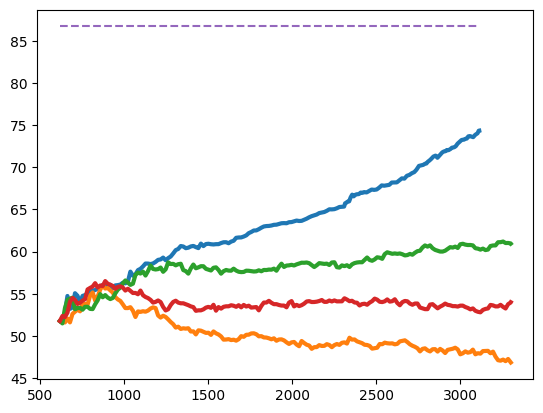

<Figure size 640x480 with 0 Axes>

In [7]:
just_save_legend_experiment_2()